**The Notebook contains the code for Building Neural Network for CIFAR-10 class data which is a classification based.**

#### Target of Book: 

The architecture has to be made up using different convolutional methods such as DILATION, DEPTHWISE, without using MAXPOOLING which must have receptive field greater than 44 and have parameters less than 200K achieving validation accuracy of 85%.

#### Description:


   * The network architecture is built up on involving different convolutions, features.

   * This network has been reduced to usage of lesser number of parameters **(176826) ~ 18 thousand parameter**, which makes it a lighter model.

   * The Architecture only has Convolutions, Relu activation function, and returning result with softmax, which returns a list of probabilites of classes and will contain  (BatchNormalization, Dropouts, Augmentations, GAP Layer at final layer).

   * The Receptive Field looks out a 32x32 at the end.

   * EPOCHS: Iterated the dataset for 84 times.

   * BATCHSIZE : 128

Accuracies are mentioned in the "Results" section and "analysis" is made.

As per my view & visualizations, the model's accuracy has been great compared to previous architecture it starts with underfitted accuracies and regain the good accuracy score.

In [9]:
%matplotlib inline

In [10]:
import sys
PATH = "/kaggle/input/utility-scripts"
sys.path.insert(1, PATH)

#### A. Importing Libraries

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
# from model import Net 
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 
import torch.backends.cudnn as cudnn 
from torch.utils.data import Dataset,DataLoader



from utils import Draw,loader,class_accuracy
from model import Net
from main import Performance

#### B. DataLoading & Data-splitting & Data Augmenting

In [12]:
trainloader,testloader = loader.load_data()

Files already downloaded and verified
Files already downloaded and verified


#### C. Visualizations

> Lets view testing set images

Plotting Test Images!
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck
3 images are plotted


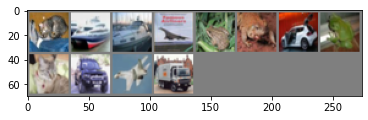

In [13]:
# get some random testing images
from colorama import Fore,Style

print(Style.BRIGHT+Fore.GREEN+'Plotting Test Images!')
dataiter = next(iter(testloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

> Lets view training set images

Plotting Train Images!
plane   car plane  ship horse plane horse truck horse  bird plane   car
3 images are plotted


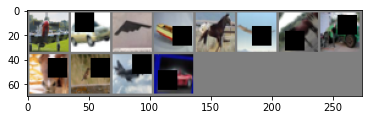

In [14]:

print(Style.BRIGHT+Fore.RED+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
# plt.imshow(image_set[4])
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

#### D. Model Summary

In [15]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,640
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 16, 16]           9,248
       BatchNorm2d-8           [-1, 32, 16, 16]              64
              ReLU-9           [-1, 32, 16, 16]               0
           Conv2d-10          [-1, 128, 12, 12]          36,992
      BatchNorm2d-11          [-1, 128, 12, 12]             256
             ReLU-12          [-1, 128, 12, 12]               0
           Conv2d-13           [-1, 64, 10, 10]          73,792
      BatchNorm2d-14           [-1, 64,

#### E. Model Schooling. 

> Here where the model learns and evaluates it self

> **Model Design**:
  
          Input Image = (32,32,3) ~ RGB channeled 32x32 Matrix

          4 Convolutional Blocks: 

          Block1: 3 Conv layers     
          +
          Block2: Dilated Conv + 2 Conv layers
          +
          Block3: Depthwise seperable Conv layers(2)
          +
          Block4 : 3 Conv layers
          +
          Gap Layer 

          Total of 3 + 3 + 2 + 3 + 1 = 12 Convolutional layers.
         
          

In [16]:
# model =  Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 84
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Performance().train(model, device, trainloader, optimizer, epoch)
    Performance().test(model, device, testloader)

EPOCH: 0


Loss=1.399357557296753 Batch_id=390 train-Accuracy=35.81: 100%|██████████| 391/391 [00:12<00:00, 31.94it/s] 



Test set: Average loss: 0.0110, val-Accuracy: 4876/10000 (48.76%)

EPOCH: 1


Loss=1.234691858291626 Batch_id=390 train-Accuracy=46.50: 100%|██████████| 391/391 [00:12<00:00, 31.24it/s] 



Test set: Average loss: 0.0096, val-Accuracy: 5622/10000 (56.22%)

EPOCH: 2


Loss=1.3470178842544556 Batch_id=390 train-Accuracy=51.47: 100%|██████████| 391/391 [00:12<00:00, 32.02it/s]



Test set: Average loss: 0.0090, val-Accuracy: 5907/10000 (59.07%)

EPOCH: 3


Loss=1.3407858610153198 Batch_id=390 train-Accuracy=54.92: 100%|██████████| 391/391 [00:12<00:00, 31.33it/s]



Test set: Average loss: 0.0078, val-Accuracy: 6530/10000 (65.30%)

EPOCH: 4


Loss=1.0164885520935059 Batch_id=390 train-Accuracy=58.04: 100%|██████████| 391/391 [00:12<00:00, 32.46it/s]



Test set: Average loss: 0.0073, val-Accuracy: 6733/10000 (67.33%)

EPOCH: 5


Loss=1.1082704067230225 Batch_id=390 train-Accuracy=60.27: 100%|██████████| 391/391 [00:12<00:00, 31.18it/s]



Test set: Average loss: 0.0067, val-Accuracy: 6954/10000 (69.54%)

EPOCH: 6


Loss=1.0032737255096436 Batch_id=390 train-Accuracy=61.85: 100%|██████████| 391/391 [00:12<00:00, 32.02it/s]



Test set: Average loss: 0.0064, val-Accuracy: 7125/10000 (71.25%)

EPOCH: 7


Loss=1.571357250213623 Batch_id=390 train-Accuracy=63.33: 100%|██████████| 391/391 [00:12<00:00, 30.32it/s] 



Test set: Average loss: 0.0065, val-Accuracy: 7154/10000 (71.54%)

EPOCH: 8


Loss=1.2834641933441162 Batch_id=390 train-Accuracy=65.03: 100%|██████████| 391/391 [00:12<00:00, 31.75it/s]



Test set: Average loss: 0.0062, val-Accuracy: 7295/10000 (72.95%)

EPOCH: 9


Loss=0.8423761129379272 Batch_id=390 train-Accuracy=65.66: 100%|██████████| 391/391 [00:13<00:00, 29.50it/s]



Test set: Average loss: 0.0057, val-Accuracy: 7522/10000 (75.22%)

EPOCH: 10


Loss=0.8971337080001831 Batch_id=390 train-Accuracy=67.04: 100%|██████████| 391/391 [00:12<00:00, 30.58it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7608/10000 (76.08%)

EPOCH: 11


Loss=0.8815169334411621 Batch_id=390 train-Accuracy=67.51: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]



Test set: Average loss: 0.0054, val-Accuracy: 7650/10000 (76.50%)

EPOCH: 12


Loss=0.9310457110404968 Batch_id=390 train-Accuracy=68.43: 100%|██████████| 391/391 [00:12<00:00, 31.14it/s]



Test set: Average loss: 0.0053, val-Accuracy: 7645/10000 (76.45%)

EPOCH: 13


Loss=0.7779331207275391 Batch_id=390 train-Accuracy=69.03: 100%|██████████| 391/391 [00:13<00:00, 28.92it/s]



Test set: Average loss: 0.0054, val-Accuracy: 7639/10000 (76.39%)

EPOCH: 14


Loss=1.0147980451583862 Batch_id=390 train-Accuracy=69.01: 100%|██████████| 391/391 [00:12<00:00, 31.94it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7831/10000 (78.31%)

EPOCH: 15


Loss=0.7350145578384399 Batch_id=390 train-Accuracy=70.30: 100%|██████████| 391/391 [00:12<00:00, 31.04it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7838/10000 (78.38%)

EPOCH: 16


Loss=0.6856978535652161 Batch_id=390 train-Accuracy=70.90: 100%|██████████| 391/391 [00:12<00:00, 31.50it/s]



Test set: Average loss: 0.0051, val-Accuracy: 7808/10000 (78.08%)

EPOCH: 17


Loss=0.8127968907356262 Batch_id=390 train-Accuracy=71.12: 100%|██████████| 391/391 [00:12<00:00, 31.58it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7860/10000 (78.60%)

EPOCH: 18


Loss=0.8255078196525574 Batch_id=390 train-Accuracy=71.52: 100%|██████████| 391/391 [00:12<00:00, 30.72it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7942/10000 (79.42%)

EPOCH: 19


Loss=0.7947623133659363 Batch_id=390 train-Accuracy=72.12: 100%|██████████| 391/391 [00:12<00:00, 31.45it/s]



Test set: Average loss: 0.0046, val-Accuracy: 7984/10000 (79.84%)

EPOCH: 20


Loss=0.8718363642692566 Batch_id=390 train-Accuracy=72.50: 100%|██████████| 391/391 [00:12<00:00, 31.75it/s]



Test set: Average loss: 0.0046, val-Accuracy: 7960/10000 (79.60%)

EPOCH: 21


Loss=0.7918694615364075 Batch_id=390 train-Accuracy=72.60: 100%|██████████| 391/391 [00:12<00:00, 31.88it/s]



Test set: Average loss: 0.0045, val-Accuracy: 8037/10000 (80.37%)

EPOCH: 22


Loss=0.9223308563232422 Batch_id=390 train-Accuracy=73.01: 100%|██████████| 391/391 [00:12<00:00, 31.23it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7993/10000 (79.93%)

EPOCH: 23


Loss=0.8411485552787781 Batch_id=390 train-Accuracy=73.21: 100%|██████████| 391/391 [00:12<00:00, 32.04it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7962/10000 (79.62%)

EPOCH: 24


Loss=0.7911052703857422 Batch_id=390 train-Accuracy=73.47: 100%|██████████| 391/391 [00:12<00:00, 31.66it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8159/10000 (81.59%)

EPOCH: 25


Loss=0.807348906993866 Batch_id=390 train-Accuracy=74.06: 100%|██████████| 391/391 [00:12<00:00, 32.03it/s] 



Test set: Average loss: 0.0042, val-Accuracy: 8164/10000 (81.64%)

EPOCH: 26


Loss=0.7471334934234619 Batch_id=390 train-Accuracy=73.91: 100%|██████████| 391/391 [00:13<00:00, 29.77it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8167/10000 (81.67%)

EPOCH: 27


Loss=1.0239049196243286 Batch_id=390 train-Accuracy=74.35: 100%|██████████| 391/391 [00:12<00:00, 31.72it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8149/10000 (81.49%)

EPOCH: 28


Loss=0.8065077662467957 Batch_id=390 train-Accuracy=74.44: 100%|██████████| 391/391 [00:12<00:00, 30.22it/s]



Test set: Average loss: 0.0045, val-Accuracy: 8054/10000 (80.54%)

EPOCH: 29


Loss=0.7023450136184692 Batch_id=390 train-Accuracy=75.03: 100%|██████████| 391/391 [00:12<00:00, 31.54it/s] 



Test set: Average loss: 0.0043, val-Accuracy: 8152/10000 (81.52%)

EPOCH: 30


Loss=0.5469014644622803 Batch_id=390 train-Accuracy=74.90: 100%|██████████| 391/391 [00:12<00:00, 31.27it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8240/10000 (82.40%)

EPOCH: 31


Loss=1.0484334230422974 Batch_id=390 train-Accuracy=75.31: 100%|██████████| 391/391 [00:12<00:00, 32.09it/s] 



Test set: Average loss: 0.0040, val-Accuracy: 8267/10000 (82.67%)

EPOCH: 32


Loss=1.0091946125030518 Batch_id=390 train-Accuracy=75.52: 100%|██████████| 391/391 [00:12<00:00, 31.38it/s] 



Test set: Average loss: 0.0042, val-Accuracy: 8210/10000 (82.10%)

EPOCH: 33


Loss=0.6621917486190796 Batch_id=390 train-Accuracy=75.71: 100%|██████████| 391/391 [00:12<00:00, 32.43it/s]



Test set: Average loss: 0.0040, val-Accuracy: 8214/10000 (82.14%)

EPOCH: 34


Loss=0.5831061005592346 Batch_id=390 train-Accuracy=75.80: 100%|██████████| 391/391 [00:12<00:00, 31.70it/s] 



Test set: Average loss: 0.0041, val-Accuracy: 8229/10000 (82.29%)

EPOCH: 35


Loss=0.7070422768592834 Batch_id=390 train-Accuracy=75.81: 100%|██████████| 391/391 [00:12<00:00, 32.15it/s] 



Test set: Average loss: 0.0040, val-Accuracy: 8288/10000 (82.88%)

EPOCH: 36


Loss=0.6024784445762634 Batch_id=390 train-Accuracy=76.49: 100%|██████████| 391/391 [00:12<00:00, 30.36it/s] 



Test set: Average loss: 0.0039, val-Accuracy: 8304/10000 (83.04%)

EPOCH: 37


Loss=0.6435492634773254 Batch_id=390 train-Accuracy=76.18: 100%|██████████| 391/391 [00:12<00:00, 30.94it/s] 



Test set: Average loss: 0.0040, val-Accuracy: 8259/10000 (82.59%)

EPOCH: 38


Loss=0.5240810513496399 Batch_id=390 train-Accuracy=76.50: 100%|██████████| 391/391 [00:12<00:00, 31.00it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8206/10000 (82.06%)

EPOCH: 39


Loss=0.7847208380699158 Batch_id=390 train-Accuracy=76.70: 100%|██████████| 391/391 [00:12<00:00, 32.22it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8389/10000 (83.89%)

EPOCH: 40


Loss=0.8310186266899109 Batch_id=390 train-Accuracy=77.05: 100%|██████████| 391/391 [00:12<00:00, 31.63it/s] 



Test set: Average loss: 0.0039, val-Accuracy: 8319/10000 (83.19%)

EPOCH: 41


Loss=0.6716296672821045 Batch_id=390 train-Accuracy=76.82: 100%|██████████| 391/391 [00:12<00:00, 31.93it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8374/10000 (83.74%)

EPOCH: 42


Loss=0.71357661485672 Batch_id=390 train-Accuracy=76.99: 100%|██████████| 391/391 [00:12<00:00, 31.87it/s]   



Test set: Average loss: 0.0039, val-Accuracy: 8275/10000 (82.75%)

EPOCH: 43


Loss=0.7856040596961975 Batch_id=390 train-Accuracy=77.51: 100%|██████████| 391/391 [00:12<00:00, 31.17it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8377/10000 (83.77%)

EPOCH: 44


Loss=0.6667654514312744 Batch_id=390 train-Accuracy=77.59: 100%|██████████| 391/391 [00:12<00:00, 31.52it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8360/10000 (83.60%)

EPOCH: 45


Loss=0.6635586023330688 Batch_id=390 train-Accuracy=77.58: 100%|██████████| 391/391 [00:12<00:00, 30.76it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8370/10000 (83.70%)

EPOCH: 46


Loss=0.7725424766540527 Batch_id=390 train-Accuracy=77.88: 100%|██████████| 391/391 [00:12<00:00, 32.23it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8400/10000 (84.00%)

EPOCH: 47


Loss=0.781286895275116 Batch_id=390 train-Accuracy=78.09: 100%|██████████| 391/391 [00:12<00:00, 30.96it/s]  



Test set: Average loss: 0.0036, val-Accuracy: 8439/10000 (84.39%)

EPOCH: 48


Loss=0.8275996446609497 Batch_id=390 train-Accuracy=78.18: 100%|██████████| 391/391 [00:12<00:00, 31.62it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8358/10000 (83.58%)

EPOCH: 49


Loss=0.4495374262332916 Batch_id=390 train-Accuracy=77.74: 100%|██████████| 391/391 [00:12<00:00, 30.16it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8391/10000 (83.91%)

EPOCH: 50


Loss=0.5963174104690552 Batch_id=390 train-Accuracy=78.16: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8450/10000 (84.50%)

EPOCH: 51


Loss=0.42984017729759216 Batch_id=390 train-Accuracy=78.50: 100%|██████████| 391/391 [00:13<00:00, 29.25it/s]



Test set: Average loss: 0.0036, val-Accuracy: 8426/10000 (84.26%)

EPOCH: 52


Loss=0.576964795589447 Batch_id=390 train-Accuracy=78.21: 100%|██████████| 391/391 [00:13<00:00, 30.05it/s]  



Test set: Average loss: 0.0036, val-Accuracy: 8478/10000 (84.78%)

EPOCH: 53


Loss=0.6993091106414795 Batch_id=390 train-Accuracy=78.58: 100%|██████████| 391/391 [00:13<00:00, 28.72it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8460/10000 (84.60%)

EPOCH: 54


Loss=0.6192824840545654 Batch_id=390 train-Accuracy=78.53: 100%|██████████| 391/391 [00:12<00:00, 30.57it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8490/10000 (84.90%)

EPOCH: 55


Loss=0.7547648549079895 Batch_id=390 train-Accuracy=78.64: 100%|██████████| 391/391 [00:12<00:00, 30.77it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8505/10000 (85.05%)

EPOCH: 56


Loss=0.5433696508407593 Batch_id=390 train-Accuracy=78.47: 100%|██████████| 391/391 [00:12<00:00, 30.67it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8459/10000 (84.59%)

EPOCH: 57


Loss=0.7190523743629456 Batch_id=390 train-Accuracy=78.67: 100%|██████████| 391/391 [00:13<00:00, 28.65it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8441/10000 (84.41%)

EPOCH: 58


Loss=0.7397924661636353 Batch_id=390 train-Accuracy=79.19: 100%|██████████| 391/391 [00:12<00:00, 30.11it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8475/10000 (84.75%)

EPOCH: 59


Loss=0.440854012966156 Batch_id=390 train-Accuracy=78.81: 100%|██████████| 391/391 [00:13<00:00, 29.38it/s]  



Test set: Average loss: 0.0034, val-Accuracy: 8508/10000 (85.08%)

EPOCH: 60


Loss=0.6650174260139465 Batch_id=390 train-Accuracy=78.81: 100%|██████████| 391/391 [00:13<00:00, 29.78it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8544/10000 (85.44%)

EPOCH: 61


Loss=0.6372582912445068 Batch_id=390 train-Accuracy=79.41: 100%|██████████| 391/391 [00:13<00:00, 29.62it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8370/10000 (83.70%)

EPOCH: 62


Loss=0.6450246572494507 Batch_id=390 train-Accuracy=79.22: 100%|██████████| 391/391 [00:12<00:00, 32.09it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8548/10000 (85.48%)

EPOCH: 63


Loss=0.5681235194206238 Batch_id=390 train-Accuracy=79.05: 100%|██████████| 391/391 [00:12<00:00, 31.64it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8481/10000 (84.81%)

EPOCH: 64


Loss=0.678051769733429 Batch_id=390 train-Accuracy=79.66: 100%|██████████| 391/391 [00:12<00:00, 32.40it/s]  



Test set: Average loss: 0.0033, val-Accuracy: 8543/10000 (85.43%)

EPOCH: 65


Loss=0.8003649711608887 Batch_id=390 train-Accuracy=79.63: 100%|██████████| 391/391 [00:12<00:00, 30.60it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8497/10000 (84.97%)

EPOCH: 66


Loss=0.9443851709365845 Batch_id=390 train-Accuracy=79.56: 100%|██████████| 391/391 [00:12<00:00, 31.60it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8511/10000 (85.11%)

EPOCH: 67


Loss=0.616309404373169 Batch_id=390 train-Accuracy=79.89: 100%|██████████| 391/391 [00:12<00:00, 30.58it/s]  



Test set: Average loss: 0.0034, val-Accuracy: 8512/10000 (85.12%)

EPOCH: 68


Loss=0.49685415625572205 Batch_id=390 train-Accuracy=80.09: 100%|██████████| 391/391 [00:12<00:00, 31.87it/s]



Test set: Average loss: 0.0034, val-Accuracy: 8532/10000 (85.32%)

EPOCH: 69


Loss=0.7322909832000732 Batch_id=390 train-Accuracy=79.92: 100%|██████████| 391/391 [00:12<00:00, 31.10it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8542/10000 (85.42%)

EPOCH: 70


Loss=0.5182846188545227 Batch_id=390 train-Accuracy=79.91: 100%|██████████| 391/391 [00:12<00:00, 32.07it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8583/10000 (85.83%)

EPOCH: 71


Loss=0.5971119403839111 Batch_id=390 train-Accuracy=79.97: 100%|██████████| 391/391 [00:12<00:00, 31.18it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8568/10000 (85.68%)

EPOCH: 72


Loss=0.4454447627067566 Batch_id=390 train-Accuracy=80.15: 100%|██████████| 391/391 [00:12<00:00, 31.35it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8513/10000 (85.13%)

EPOCH: 73


Loss=0.41186267137527466 Batch_id=390 train-Accuracy=80.09: 100%|██████████| 391/391 [00:12<00:00, 30.46it/s]



Test set: Average loss: 0.0034, val-Accuracy: 8550/10000 (85.50%)

EPOCH: 74


Loss=0.6144510507583618 Batch_id=390 train-Accuracy=80.41: 100%|██████████| 391/391 [00:12<00:00, 31.80it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8541/10000 (85.41%)

EPOCH: 75


Loss=0.3857709765434265 Batch_id=390 train-Accuracy=80.03: 100%|██████████| 391/391 [00:12<00:00, 31.39it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8587/10000 (85.87%)

EPOCH: 76


Loss=0.6059732437133789 Batch_id=390 train-Accuracy=80.29: 100%|██████████| 391/391 [00:12<00:00, 31.99it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8534/10000 (85.34%)

EPOCH: 77


Loss=0.4195144772529602 Batch_id=390 train-Accuracy=80.31: 100%|██████████| 391/391 [00:12<00:00, 30.73it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8578/10000 (85.78%)

EPOCH: 78


Loss=0.5643730759620667 Batch_id=390 train-Accuracy=80.20: 100%|██████████| 391/391 [00:12<00:00, 31.74it/s] 



Test set: Average loss: 0.0032, val-Accuracy: 8633/10000 (86.33%)

EPOCH: 79


Loss=0.5589433312416077 Batch_id=390 train-Accuracy=80.83: 100%|██████████| 391/391 [00:11<00:00, 32.86it/s] 



Test set: Average loss: 0.0032, val-Accuracy: 8577/10000 (85.77%)

EPOCH: 80


Loss=0.7819346189498901 Batch_id=390 train-Accuracy=80.34: 100%|██████████| 391/391 [00:12<00:00, 32.55it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8595/10000 (85.95%)

EPOCH: 81


Loss=1.0031039714813232 Batch_id=390 train-Accuracy=80.69: 100%|██████████| 391/391 [00:11<00:00, 32.60it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8588/10000 (85.88%)

EPOCH: 82


Loss=0.6692079305648804 Batch_id=390 train-Accuracy=80.47: 100%|██████████| 391/391 [00:12<00:00, 32.05it/s] 



Test set: Average loss: 0.0032, val-Accuracy: 8615/10000 (86.15%)

EPOCH: 83


Loss=0.465636670589447 Batch_id=390 train-Accuracy=81.17: 100%|██████████| 391/391 [00:12<00:00, 32.02it/s]  



Test set: Average loss: 0.0033, val-Accuracy: 8570/10000 (85.70%)



#### F. Plots of train, test Scores

In [20]:
from main import scores
train_acc,train_losses = scores()[:2]
test_acc,test_losses = scores()[2:]

Text(0.5, 1.0, 'Test Accuracy')

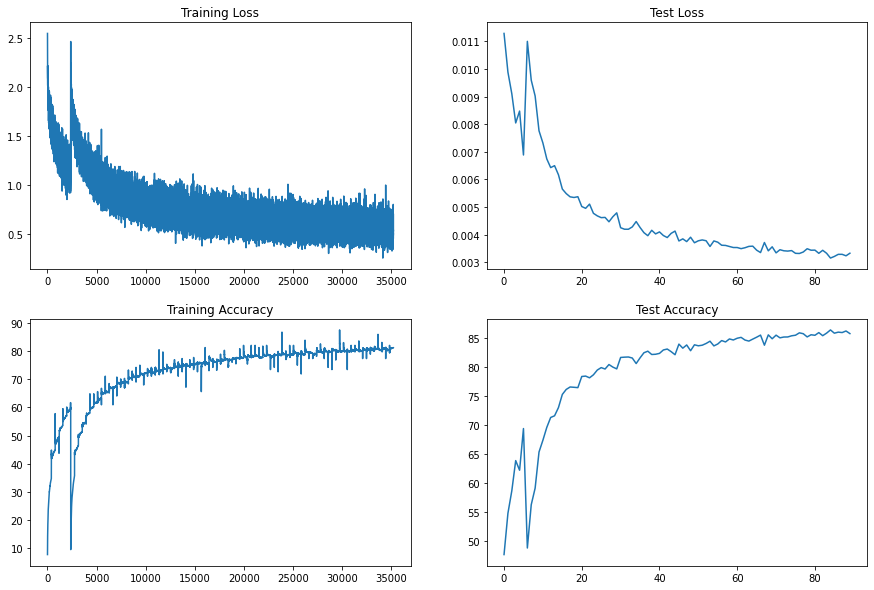

In [21]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

#### G. Class-Wise Accuracies

In [22]:
class_accuracies = class_accuracy.rate(testloader,model,classes)

In [23]:
for label,acc in class_accuracies.items():
  print(label,":",round(acc,2))

plane : 89.66
car : 96.43
bird : 72.73
cat : 67.65
deer : 77.78
dog : 78.79
frog : 88.89
horse : 92.0
ship : 93.75
truck : 87.18


In [24]:
print(Style.BRIGHT+Fore.GREEN+"Done!")

Done!
